In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import idx2numpy
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
def IDXtoArray(file):
    darray = idx2numpy.convert_from_file(file)
    return darray
train_x=IDXtoArray('train-images-idx3-ubyte')
train_y=IDXtoArray('train-labels-idx1-ubyte')
test_x=IDXtoArray('t10k-images-idx3-ubyte')
test_y=IDXtoArray('t10k-labels-idx1-ubyte')

In [3]:
def reshape(data_array,rows,columns):
    array_reshaped=data_array.reshape(rows,columns)
    return array_reshaped
train_x=reshape(train_x,60000,784)
test_x=reshape(test_x,10000,784)

In [4]:
train_x_new,test_x_new,train_y_new,test_y_new=train_test_split(train_x,train_y,test_size=0.3, random_state=42)

In [5]:
y_trainnew=train_y
train_y = pd.get_dummies(train_y)
train_y=np.array(train_y)
train_y_new = pd.get_dummies(train_y_new)
train_y_new=np.array(train_y_new)

In [6]:
def initialize_weights(input_vector, hidden_neurons, output_neurons):
    weights=np.random.randn(input_vector,hidden_neurons)*np.sqrt(1./input_vector)
    bias=np.zeros((1, hidden_neurons))*np.sqrt(1./input_vector)
    weights_new=np.random.randn(hidden_neurons,output_neurons)*np.sqrt(1./hidden_neurons)
    bias_new= np.zeros((1, output_neurons))*np.sqrt(1./hidden_neurons)
    return weights, bias, weights_new, bias_new

In [7]:
def sigmoid(z):
    return 1. / (1. + np.exp(-z))
def tanh(z):
    return (np.exp(z)-np.exp(-z))/(np.exp(z)+np.exp(-z))
def softmax(z):
    return np.exp(z)/np.sum(np.exp(z), axis=1,keepdims=True)                                        
def sigmoid_derivative(h1):
    return h1*(1-h1)
def tanh_derivative(h1):
    return 1-h1**2

In [8]:
def feedforward(train_x,weight,bias,weight_new,bias_new,activation):
    z1= np.dot(train_x,weight)+bias
    h1=activation(z1)
    z2=np.dot(h1,weight_new)+bias_new
    output=softmax(z2)
    return z1, h1, z2, output

In [9]:
def backpropagation(h1,weight_new,ypred,train_y,train_x,derive):
    n_samples = train_y.shape[0]
    L = (ypred-train_y)/n_samples
    change_output=L
    delta_W2= np.dot(h1.T,change_output)
    delta_b2= np.sum(change_output,axis=0,keepdims=True)
    delta_h1=np.dot(change_output,weight_new.T)
    change_h1= delta_h1*derive(h1)
    delta_W1= np.dot(train_x.T, change_h1)
    delta_b1= np.sum(change_h1,axis=0,keepdims=True)
    return delta_W2, delta_b2, delta_W1, delta_b1

In [10]:
def update_weights(alpha,weight,bias,weight_new,bias_new,delta_W2,delta_b2,delta_W1,delta_b1):
    weight_new= weight_new- alpha*(delta_W2)
    bias_new= bias_new - alpha*(delta_b2)
    weight= weight- alpha*(delta_W1)
    bias=bias- alpha*(delta_b1)
    return weight_new,bias_new,weight,bias

In [11]:
def training(train_x,train_y,neurons,n,iterations,activation,derive):
    hidden_neurons=neurons
    inputs=train_x.shape[1]
    output_neurons=train_y.shape[1]
    alpha= n
    epochs=iterations
    labely_train=np.argmax(train_y,axis=1)
    weight, bias, weight_new, bias_new= initialize_weights(inputs,hidden_neurons,output_neurons)
    li=[]
    listloss=[]
    for i in range(epochs):
        dotprod1, h1, dotprod2, output=feedforward(train_x,weight,bias,weight_new,bias_new,activation)
        #back propogate
        delta_W2, delta_b2, delta_W1, delta_b1= backpropagation(h1,weight_new,output,train_y,train_x,derive)
        #update weights using gradient descent
        weight_new,bias_new,weight,bias=update_weights(alpha,weight,bias,weight_new,bias_new,delta_W2,delta_b2,delta_W1,delta_b1)
        #again feed forward using updated weights
        dotpro1, h1, dotprod2, output=feedforward(train_x,weight,bias,weight_new,bias_new,activation)
        #Cross Entropy Loss
        L_sum = np.sum(np.multiply(train_y, np.log(output)))
        num_samples = train_y.shape[0]
        loss = -(1./num_samples) * L_sum
        print("Iteration {}: loss while training = {}".format(i + 1,loss))
        listloss.append(loss)
        #Retrieving the corresponding class labels:
        labelpred=np.argmax(output,axis=1)
        #Training Accuracy:
        accuracy = round((accuracy_score(labely_train, labelpred)*100),2)
        print("Training Accuracy after Iteration {} : {}%".format(i+1, accuracy))
        li.append(accuracy)
        
    return weight_new,bias_new,weight,bias,li,listloss

In [12]:
def accuracy(labely_test, labelpred):
    accuracytest = round((accuracy_score(labely_test, labelpred)*100),2)
    return accuracytest
def testing(W2,b2,W1,b1,X_t,y_t,actfunc):
    dotprod1, h1, dotprod2, output=feedforward(X_t,W1,b1,W2,b2,actfunc)   
    labely_test=y_t
    labelpred=np.argmax(output,axis=1)
    return labely_test,labelpred

In [13]:
W2,b2,W1,b1,li1,loss1=training(train_x_new,train_y_new,128,0.02,200,sigmoid,sigmoid_derivative)

Iteration 1: loss while training = 2.3691793745754297
Training Accuracy after Iteration 1 : 11.88%
Iteration 2: loss while training = 2.290002785752577
Training Accuracy after Iteration 2 : 14.5%
Iteration 3: loss while training = 2.2254234645237356
Training Accuracy after Iteration 3 : 18.1%
Iteration 4: loss while training = 2.1691200762950626
Training Accuracy after Iteration 4 : 22.31%
Iteration 5: loss while training = 2.121231415108385
Training Accuracy after Iteration 5 : 26.36%
Iteration 6: loss while training = 2.0790549435850227
Training Accuracy after Iteration 6 : 30.45%
Iteration 7: loss while training = 2.0405678815622266
Training Accuracy after Iteration 7 : 34.1%
Iteration 8: loss while training = 2.004720956456054
Training Accuracy after Iteration 8 : 37.29%
Iteration 9: loss while training = 1.971189418957832
Training Accuracy after Iteration 9 : 40.15%
Iteration 10: loss while training = 1.939818140800363
Training Accuracy after Iteration 10 : 42.63%
Iteration 11: lo

Iteration 83: loss while training = 0.9999623184665046
Training Accuracy after Iteration 83 : 80.86%
Iteration 84: loss while training = 0.9943012738620415
Training Accuracy after Iteration 84 : 80.97%
Iteration 85: loss while training = 0.9886735035939076
Training Accuracy after Iteration 85 : 81.09%
Iteration 86: loss while training = 0.9831028328881763
Training Accuracy after Iteration 86 : 81.2%
Iteration 87: loss while training = 0.977620692552528
Training Accuracy after Iteration 87 : 81.34%
Iteration 88: loss while training = 0.9722589103443862
Training Accuracy after Iteration 88 : 81.43%
Iteration 89: loss while training = 0.967006022732408
Training Accuracy after Iteration 89 : 81.57%
Iteration 90: loss while training = 0.9618095517172206
Training Accuracy after Iteration 90 : 81.69%
Iteration 91: loss while training = 0.956666403339401
Training Accuracy after Iteration 91 : 81.79%
Iteration 92: loss while training = 0.9515723148321763
Training Accuracy after Iteration 92 : 8

Iteration 164: loss while training = 0.7082529507423696
Training Accuracy after Iteration 164 : 86.2%
Iteration 165: loss while training = 0.7059905899797208
Training Accuracy after Iteration 165 : 86.23%
Iteration 166: loss while training = 0.703748683665723
Training Accuracy after Iteration 166 : 86.28%
Iteration 167: loss while training = 0.7015251769327572
Training Accuracy after Iteration 167 : 86.31%
Iteration 168: loss while training = 0.699317302592104
Training Accuracy after Iteration 168 : 86.33%
Iteration 169: loss while training = 0.6971233904811107
Training Accuracy after Iteration 169 : 86.35%
Iteration 170: loss while training = 0.6949431040823995
Training Accuracy after Iteration 170 : 86.39%
Iteration 171: loss while training = 0.6927761762867269
Training Accuracy after Iteration 171 : 86.41%
Iteration 172: loss while training = 0.6906234247790418
Training Accuracy after Iteration 172 : 86.46%
Iteration 173: loss while training = 0.6884865913979531
Training Accuracy af

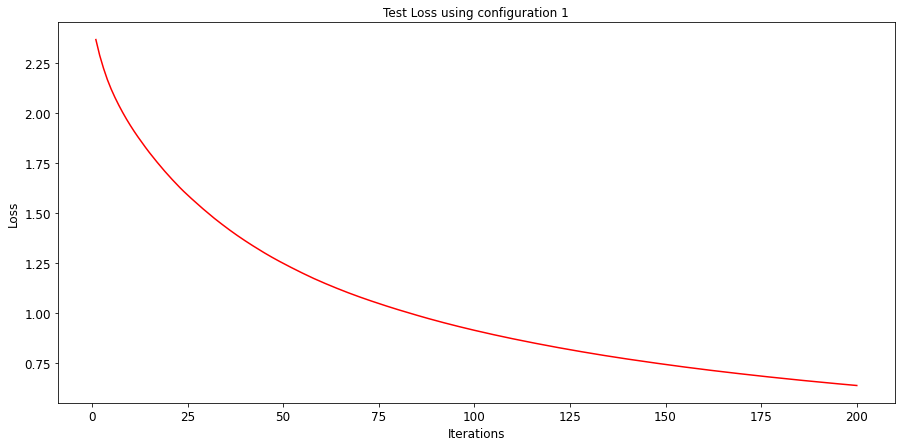

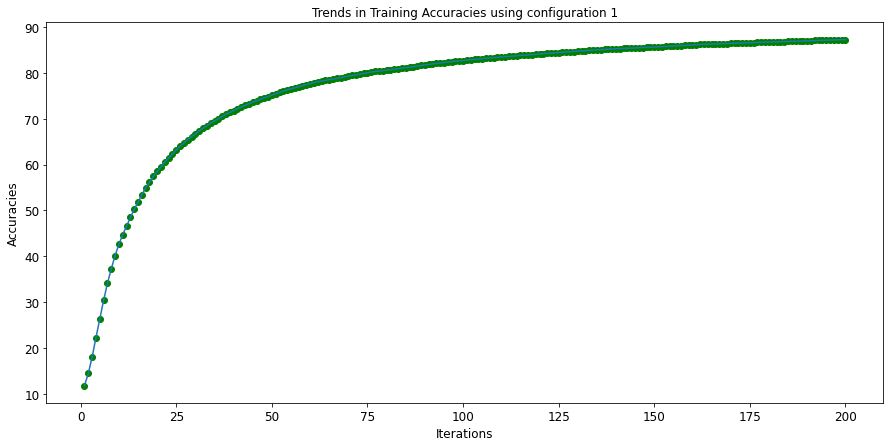

In [14]:
epochs = list(range(1,200+1))
loss= loss1
plt.figure(figsize=(15,7))
plt.title('Test Loss using configuration 1', fontsize=12)
plt.xlabel('Iterations', size=12)
plt.ylabel('Loss', fontsize=12)
plt.tick_params(labelsize=12);
plt.plot(epochs,loss,c='red')
epochs = list(range(1,200+1))
accuracies= li1
plt.figure(figsize=(15,7))
plt.title('Trends in Training Accuracies using configuration 1', fontsize=12)
plt.xlabel('Iterations', size=12)
plt.ylabel('Accuracies', fontsize=12)
plt.tick_params(labelsize=12);
plt.scatter(epochs,accuracies,alpha=1,c='green')
plt.plot(epochs,accuracies)

In [15]:
labely_test,labelpred=testing(W2,b2,W1,b1,test_x_new,test_y_new,sigmoid)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Validation data using configuration 1: {}%".format(accuracy_val))
acc1=accuracy_val

Accuracy on Validation data using configuration 1: 86.57%


In [16]:
W2,b2,W1,b1,li2,loss2=training(train_x_new,train_y_new,64,0.05,200,sigmoid, sigmoid_derivative)

Iteration 1: loss while training = 2.266566216032099
Training Accuracy after Iteration 1 : 17.25%
Iteration 2: loss while training = 2.130929548219838
Training Accuracy after Iteration 2 : 24.98%
Iteration 3: loss while training = 2.0320833879292715
Training Accuracy after Iteration 3 : 31.61%
Iteration 4: loss while training = 1.951333325372342
Training Accuracy after Iteration 4 : 37.13%
Iteration 5: loss while training = 1.8862178604087874
Training Accuracy after Iteration 5 : 42.22%
Iteration 6: loss while training = 1.829199305342879
Training Accuracy after Iteration 6 : 46.27%
Iteration 7: loss while training = 1.7780723330247614
Training Accuracy after Iteration 7 : 49.75%
Iteration 8: loss while training = 1.7315644598575373
Training Accuracy after Iteration 8 : 52.64%
Iteration 9: loss while training = 1.6888597653406943
Training Accuracy after Iteration 9 : 55.46%
Iteration 10: loss while training = 1.6495938421896488
Training Accuracy after Iteration 10 : 57.89%
Iteration 11

Iteration 83: loss while training = 0.7658352145705946
Training Accuracy after Iteration 83 : 85.37%
Iteration 84: loss while training = 0.7608830633737279
Training Accuracy after Iteration 84 : 85.45%
Iteration 85: loss while training = 0.7569338082601558
Training Accuracy after Iteration 85 : 85.49%
Iteration 86: loss while training = 0.752709616277513
Training Accuracy after Iteration 86 : 85.65%
Iteration 87: loss while training = 0.7476285955972494
Training Accuracy after Iteration 87 : 85.67%
Iteration 88: loss while training = 0.7430548093670607
Training Accuracy after Iteration 88 : 85.8%
Iteration 89: loss while training = 0.7391872080928493
Training Accuracy after Iteration 89 : 85.8%
Iteration 90: loss while training = 0.7347952194868517
Training Accuracy after Iteration 90 : 85.95%
Iteration 91: loss while training = 0.7310401376808036
Training Accuracy after Iteration 91 : 85.94%
Iteration 92: loss while training = 0.7265966805730263
Training Accuracy after Iteration 92 : 

Iteration 164: loss while training = 0.5358858286150149
Training Accuracy after Iteration 164 : 89.13%
Iteration 165: loss while training = 0.5346803672814096
Training Accuracy after Iteration 165 : 89.27%
Iteration 166: loss while training = 0.5322640333659677
Training Accuracy after Iteration 166 : 89.19%
Iteration 167: loss while training = 0.5306508403979905
Training Accuracy after Iteration 167 : 89.36%
Iteration 168: loss while training = 0.5286259817432595
Training Accuracy after Iteration 168 : 89.24%
Iteration 169: loss while training = 0.5268985410314858
Training Accuracy after Iteration 169 : 89.44%
Iteration 170: loss while training = 0.5252547738252099
Training Accuracy after Iteration 170 : 89.27%
Iteration 171: loss while training = 0.5241996669779572
Training Accuracy after Iteration 171 : 89.44%
Iteration 172: loss while training = 0.5218900610068311
Training Accuracy after Iteration 172 : 89.35%
Iteration 173: loss while training = 0.5207671866966584
Training Accuracy

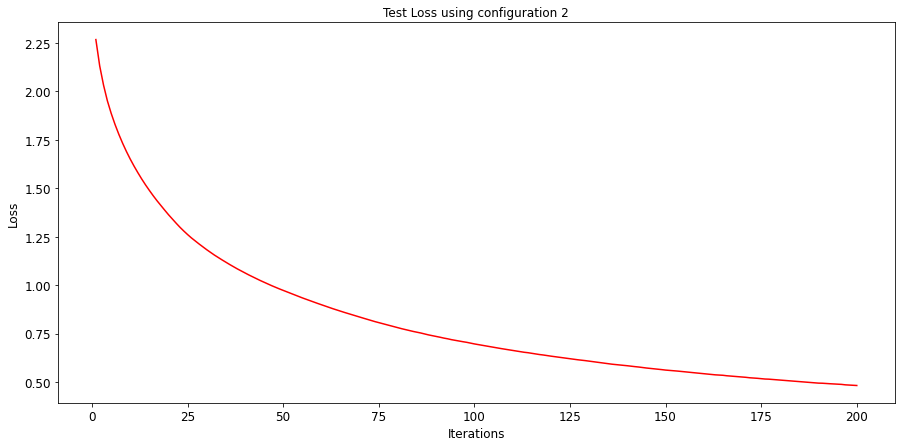

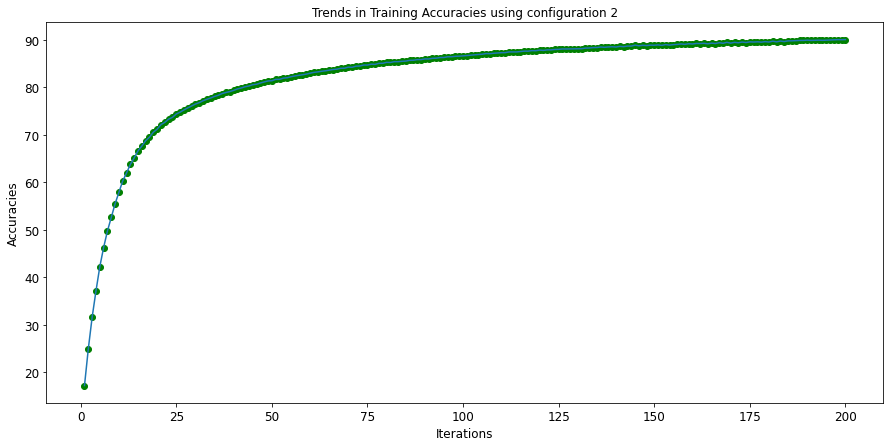

In [17]:
epochs = list(range(1,200+1))
loss= loss2
plt.figure(figsize=(15,7))
plt.title('Test Loss using configuration 2', fontsize=12)
plt.xlabel('Iterations', size=12)
plt.ylabel('Loss', fontsize=12)
plt.tick_params(labelsize=12);
#plt.scatter(epochs,loss,alpha=1,c='green')
plt.plot(epochs,loss,c='red')
epochs = list(range(1,200+1))
accuracies= li2
plt.figure(figsize=(15,7))
plt.title('Trends in Training Accuracies using configuration 2', fontsize=12)
plt.xlabel('Iterations', size=12)
plt.ylabel('Accuracies', fontsize=12)
plt.tick_params(labelsize=12);
plt.scatter(epochs,accuracies,alpha=1,c='green')
plt.plot(epochs,accuracies)

In [18]:
labely_test,labelpred=testing(W2,b2,W1,b1,test_x_new,test_y_new,sigmoid)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Validation data using configuration 2: {}%".format(accuracy_val))
acc2=accuracy_val

Accuracy on Validation data using configuration 2: 89.14%


In [19]:
W2,b2,W1,b1,li3,loss3=training(train_x_new,train_y_new,128,0.05,200,sigmoid,sigmoid_derivative)

Iteration 1: loss while training = 2.375183715142912
Training Accuracy after Iteration 1 : 10.11%
Iteration 2: loss while training = 2.196016117084279
Training Accuracy after Iteration 2 : 18.21%
Iteration 3: loss while training = 2.0605225833793295
Training Accuracy after Iteration 3 : 31.37%
Iteration 4: loss while training = 1.9573256626388889
Training Accuracy after Iteration 4 : 41.96%
Iteration 5: loss while training = 1.8713701997735355
Training Accuracy after Iteration 5 : 48.86%
Iteration 6: loss while training = 1.7964090420222008
Training Accuracy after Iteration 6 : 53.83%
Iteration 7: loss while training = 1.7285492448796296
Training Accuracy after Iteration 7 : 57.61%
Iteration 8: loss while training = 1.6682283321857914
Training Accuracy after Iteration 8 : 60.63%
Iteration 9: loss while training = 1.6126911189474562
Training Accuracy after Iteration 9 : 63.35%
Iteration 10: loss while training = 1.561897621051464
Training Accuracy after Iteration 10 : 65.47%
Iteration 1

Iteration 83: loss while training = 0.6089368110676723
Training Accuracy after Iteration 83 : 87.47%
Iteration 84: loss while training = 0.6050592257914758
Training Accuracy after Iteration 84 : 87.42%
Iteration 85: loss while training = 0.6015358041681816
Training Accuracy after Iteration 85 : 87.57%
Iteration 86: loss while training = 0.5977360845975588
Training Accuracy after Iteration 86 : 87.53%
Iteration 87: loss while training = 0.5942075755820128
Training Accuracy after Iteration 87 : 87.67%
Iteration 88: loss while training = 0.5907841308145001
Training Accuracy after Iteration 88 : 87.6%
Iteration 89: loss while training = 0.5876425425562568
Training Accuracy after Iteration 89 : 87.76%
Iteration 90: loss while training = 0.584169870736617
Training Accuracy after Iteration 90 : 87.65%
Iteration 91: loss while training = 0.580943488403043
Training Accuracy after Iteration 91 : 87.83%
Iteration 92: loss while training = 0.5776951784595952
Training Accuracy after Iteration 92 : 

Iteration 163: loss while training = 0.4346343466332041
Training Accuracy after Iteration 163 : 90.08%
Iteration 164: loss while training = 0.433355682697534
Training Accuracy after Iteration 164 : 90.1%
Iteration 165: loss while training = 0.4321628462451784
Training Accuracy after Iteration 165 : 90.14%
Iteration 166: loss while training = 0.43093268326898954
Training Accuracy after Iteration 166 : 90.13%
Iteration 167: loss while training = 0.4299382767634163
Training Accuracy after Iteration 167 : 90.16%
Iteration 168: loss while training = 0.4287004935662199
Training Accuracy after Iteration 168 : 90.19%
Iteration 169: loss while training = 0.4276416155924255
Training Accuracy after Iteration 169 : 90.22%
Iteration 170: loss while training = 0.4265931402384005
Training Accuracy after Iteration 170 : 90.22%
Iteration 171: loss while training = 0.42527437452416217
Training Accuracy after Iteration 171 : 90.26%
Iteration 172: loss while training = 0.42368182060741016
Training Accurac

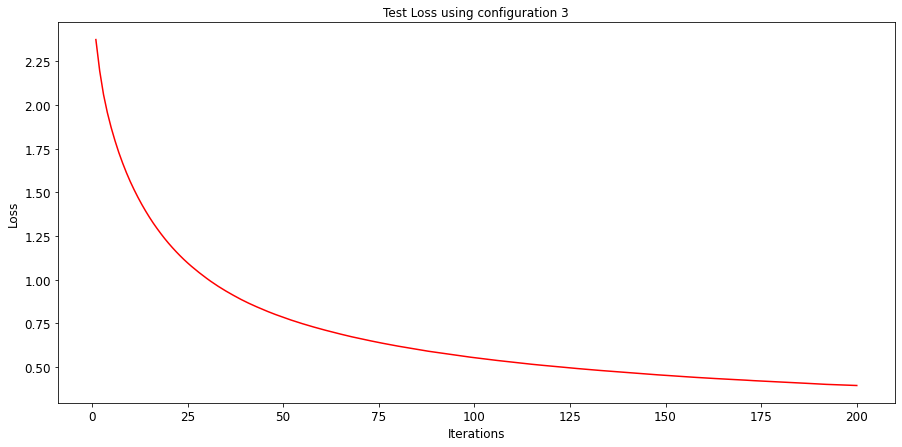

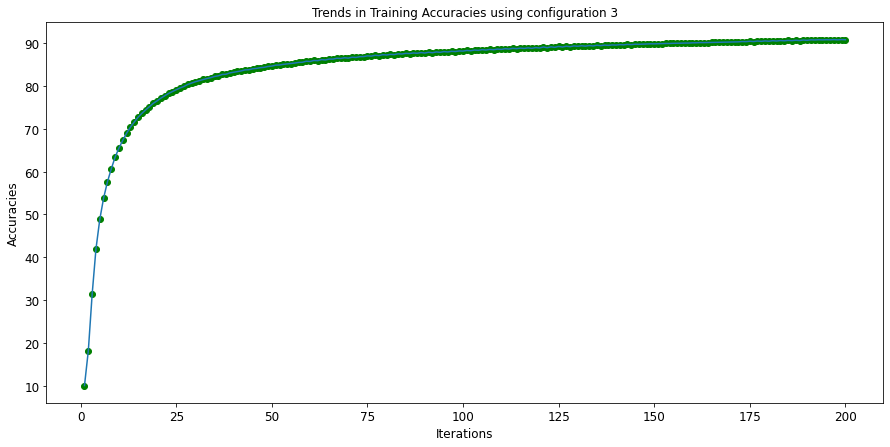

In [20]:
epochs = list(range(1,200+1))
loss= loss3
plt.figure(figsize=(15,7))
plt.title('Test Loss using configuration 3', fontsize=12)
plt.xlabel('Iterations', size=12)
plt.ylabel('Loss', fontsize=12)
plt.tick_params(labelsize=12);
#plt.scatter(epochs,loss,alpha=1,c='green')
plt.plot(epochs,loss,c='red')
epochs = list(range(1,200+1))
accuracies= li3
plt.figure(figsize=(15,7))
plt.title('Trends in Training Accuracies using configuration 3', fontsize=12)
plt.xlabel('Iterations', size=12)
plt.ylabel('Accuracies', fontsize=12)
plt.tick_params(labelsize=12);
plt.scatter(epochs,accuracies,alpha=1,c='green')
plt.plot(epochs,accuracies)

In [21]:
labely_test,labelpred=testing(W2,b2,W1,b1,test_x_new,test_y_new,sigmoid)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Validation data using configuration 3: {}%".format(accuracy_val))
acc3=accuracy_val

Accuracy on Validation data using configuration 3: 89.61%


In [22]:
W2,b2,W1,b1,li4,loss4=training(train_x_new,train_y_new,64,0.05,200,tanh, tanh_derivative)

Iteration 1: loss while training = 2.2314164983816576
Training Accuracy after Iteration 1 : 22.23%
Iteration 2: loss while training = 1.8620882488827684
Training Accuracy after Iteration 2 : 37.08%
Iteration 3: loss while training = 1.6360726060099815
Training Accuracy after Iteration 3 : 46.93%
Iteration 4: loss while training = 1.4759489933663277
Training Accuracy after Iteration 4 : 54.35%
Iteration 5: loss while training = 1.3573006106322496
Training Accuracy after Iteration 5 : 59.31%
Iteration 6: loss while training = 1.2628872800730344
Training Accuracy after Iteration 6 : 63.57%
Iteration 7: loss while training = 1.1869586196838398
Training Accuracy after Iteration 7 : 66.62%
Iteration 8: loss while training = 1.1237390077118796
Training Accuracy after Iteration 8 : 69.02%
Iteration 9: loss while training = 1.0749406150208685
Training Accuracy after Iteration 9 : 70.86%
Iteration 10: loss while training = 1.030013259482562
Training Accuracy after Iteration 10 : 72.37%
Iteration

Iteration 83: loss while training = 0.4244466706546081
Training Accuracy after Iteration 83 : 89.55%
Iteration 84: loss while training = 0.42352595326167797
Training Accuracy after Iteration 84 : 89.54%
Iteration 85: loss while training = 0.42003170611309076
Training Accuracy after Iteration 85 : 89.74%
Iteration 86: loss while training = 0.41885456238996366
Training Accuracy after Iteration 86 : 89.64%
Iteration 87: loss while training = 0.41192828452830405
Training Accuracy after Iteration 87 : 89.97%
Iteration 88: loss while training = 0.4118645333809754
Training Accuracy after Iteration 88 : 89.86%
Iteration 89: loss while training = 0.40866568871810544
Training Accuracy after Iteration 89 : 90.07%
Iteration 90: loss while training = 0.4068600370070764
Training Accuracy after Iteration 90 : 90.06%
Iteration 91: loss while training = 0.40418967700467207
Training Accuracy after Iteration 91 : 90.03%
Iteration 92: loss while training = 0.40212618434651476
Training Accuracy after Itera

Iteration 163: loss while training = 0.3197597500558637
Training Accuracy after Iteration 163 : 91.92%
Iteration 164: loss while training = 0.31710935073395113
Training Accuracy after Iteration 164 : 91.86%
Iteration 165: loss while training = 0.31934392550349955
Training Accuracy after Iteration 165 : 91.84%
Iteration 166: loss while training = 0.3178990300629984
Training Accuracy after Iteration 166 : 91.85%
Iteration 167: loss while training = 0.3160007877222498
Training Accuracy after Iteration 167 : 91.99%
Iteration 168: loss while training = 0.31346567449280704
Training Accuracy after Iteration 168 : 92.04%
Iteration 169: loss while training = 0.3132643344322169
Training Accuracy after Iteration 169 : 92.04%
Iteration 170: loss while training = 0.3158002062251515
Training Accuracy after Iteration 170 : 91.97%
Iteration 171: loss while training = 0.31133253931957416
Training Accuracy after Iteration 171 : 92.14%
Iteration 172: loss while training = 0.3118655718019563
Training Accu

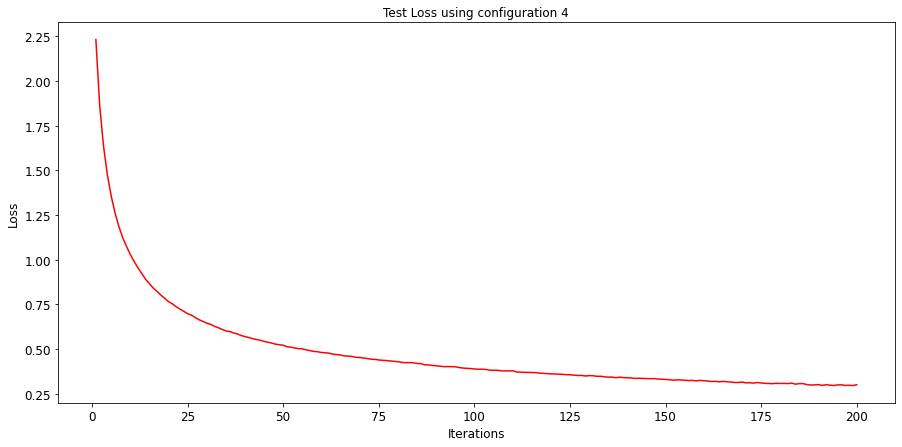

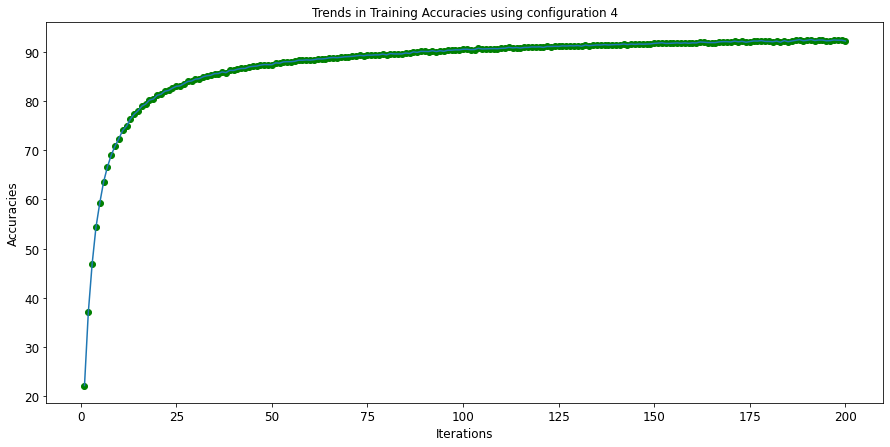

In [23]:
epochs = list(range(1,200+1))
loss= loss4
plt.figure(figsize=(15,7))
plt.title('Test Loss using configuration 4', fontsize=12)
plt.xlabel('Iterations', size=12)
plt.ylabel('Loss', fontsize=12)
plt.tick_params(labelsize=12);
#plt.scatter(epochs,loss,alpha=1,c='green')
plt.plot(epochs,loss,c='red')
epochs = list(range(1,200+1))
accuracies= li4
plt.figure(figsize=(15,7))
plt.title('Trends in Training Accuracies using configuration 4', fontsize=12)
plt.xlabel('Iterations', size=12)
plt.ylabel('Accuracies', fontsize=12)
plt.tick_params(labelsize=12);
plt.scatter(epochs,accuracies,alpha=1,c='green')
plt.plot(epochs,accuracies)

In [24]:
labely_test,labelpred=testing(W2,b2,W1,b1,test_x_new,test_y_new,tanh)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Validation data using configuration 4: {}%".format(accuracy_val))
acc4=accuracy_val

Accuracy on Validation data using configuration 4: 90.83%


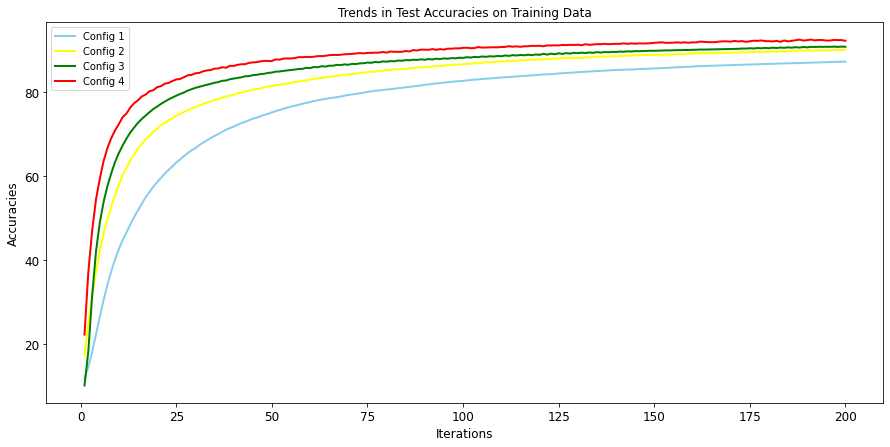

In [25]:
plt.figure(figsize=(15,7))
plt.title('Trends in Test Accuracies on Training Data', fontsize=12)
plt.xlabel('Iterations', size=12)
plt.ylabel('Accuracies', fontsize=12)
plt.tick_params(labelsize=12);
plt.plot( epochs,li1, marker='', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=2, label="Config 1")
plt.plot( epochs,li2, marker='', color='yellow', linewidth=2, label="Config 2")
plt.plot(epochs,li3, marker='', color='green', linewidth=2, label="Config 3")
plt.plot(epochs,li4, marker='', color='red', linewidth=2, label="Config 4")
plt.legend()

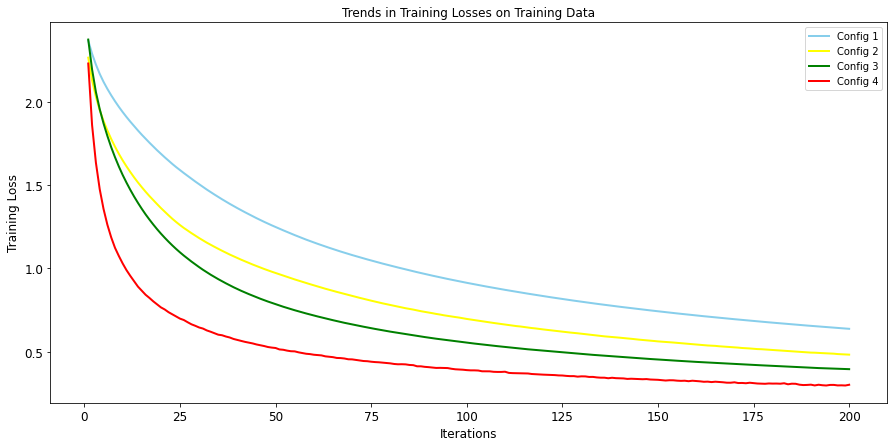

In [26]:
plt.figure(figsize=(15,7))
plt.title('Trends in Training Losses on Training Data', fontsize=12)
plt.xlabel('Iterations', size=12)
plt.ylabel('Training Loss', fontsize=12)
plt.tick_params(labelsize=12);
plt.plot( epochs,loss1, marker='', markerfacecolor='blue', markersize=2, color='skyblue', linewidth=2, label="Config 1")
plt.plot( epochs,loss2, marker='', color='yellow', linewidth=2,label="Config 2")
plt.plot(epochs,loss3, marker='', color='green', linewidth=2, label="Config 3")
plt.plot(epochs,loss4, marker='', color='red', linewidth=2, label="Config 4")
plt.legend()

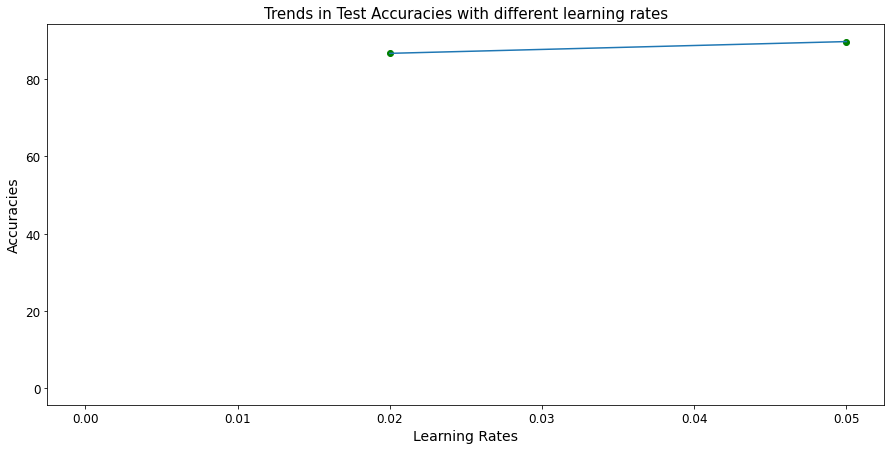

In [27]:
learning_rate=[0.02,0.05]
accuracies=[acc1,acc3]
plt.figure(figsize=(15,7))
width=0.25
plt.title('Trends in Test Accuracies with different learning rates', fontsize=15)
plt.xlabel('Learning Rates', size=14)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(learning_rate,accuracies,alpha=1,c='green')
plt.plot(learning_rate,accuracies,width)

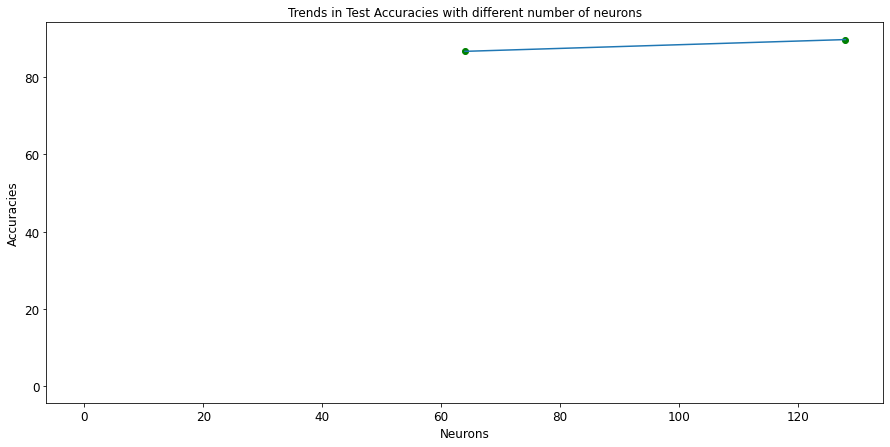

In [28]:
neurons=[64,128]
accuracies=[acc1,acc3]
plt.figure(figsize=(15,7))
width=0.25
plt.title('Trends in Test Accuracies with different number of neurons', fontsize=12)
plt.xlabel('Neurons', size=12)
plt.ylabel('Accuracies', fontsize=12)
plt.tick_params(labelsize=12);
plt.scatter(neurons,accuracies,alpha=1,c='green')
plt.plot(neurons,accuracies,width)

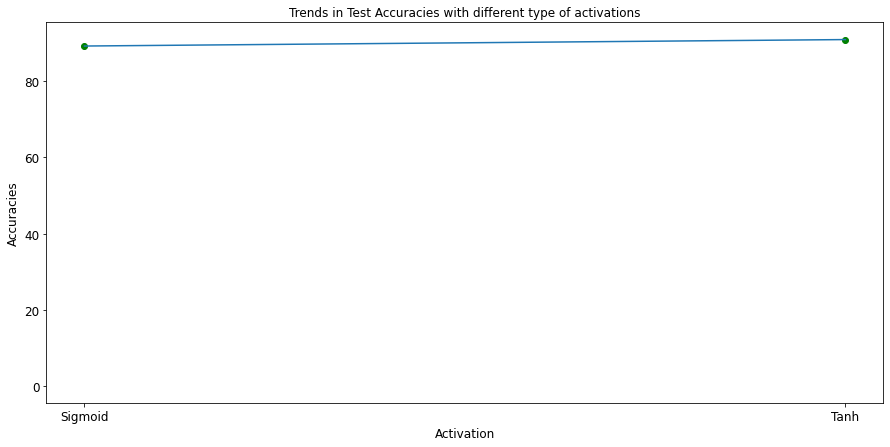

In [29]:
activation =['Sigmoid','Tanh']
accuracies=[acc2,acc4]
plt.figure(figsize=(15,7))
width=0.25
plt.title('Trends in Test Accuracies with different type of activations', fontsize=12)
plt.xlabel('Activation', size=12)
plt.ylabel('Accuracies', fontsize=12)
plt.tick_params(labelsize=12);
plt.scatter(activation,accuracies,alpha=1,c='green')
plt.plot(activation,accuracies,width)

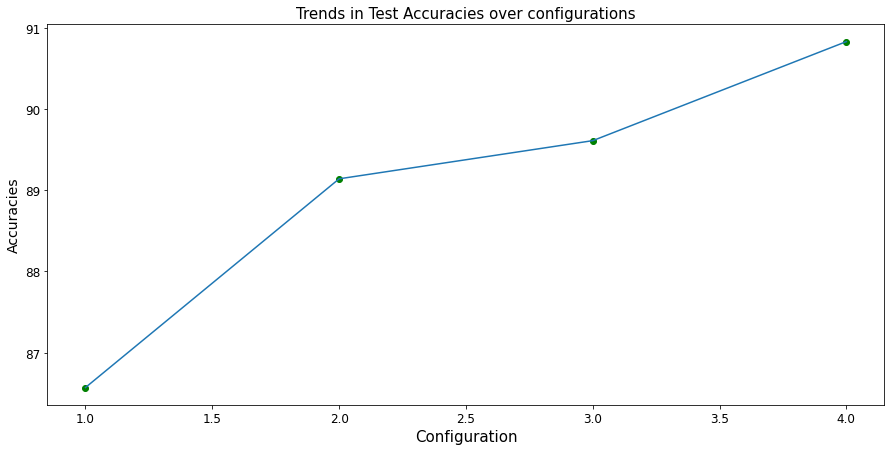

In [30]:
configurations = [1,2,3,4]
accuracies= [acc1,acc2,acc3,acc4]
plt.figure(figsize=(15,7))
plt.title('Trends in Test Accuracies over configurations', fontsize=15)
plt.xlabel('Configuration', size=15)
plt.ylabel('Accuracies', fontsize=14)
plt.tick_params(labelsize=12);
plt.scatter(configurations,accuracies,alpha=1,c='green')
plt.plot(configurations,accuracies)

In [31]:
W2,b2,W1,b1,accu_train,losstrain=training(train_x,train_y,64,0.05,200,tanh,tanh_derivative)

Iteration 1: loss while training = 1.9512884018537244
Training Accuracy after Iteration 1 : 32.95%
Iteration 2: loss while training = 1.6967863247171393
Training Accuracy after Iteration 2 : 45.65%
Iteration 3: loss while training = 1.5295030322177685
Training Accuracy after Iteration 3 : 52.92%
Iteration 4: loss while training = 1.406943379904605
Training Accuracy after Iteration 4 : 58.49%
Iteration 5: loss while training = 1.308321568073808
Training Accuracy after Iteration 5 : 62.83%
Iteration 6: loss while training = 1.2327375087888732
Training Accuracy after Iteration 6 : 65.99%
Iteration 7: loss while training = 1.1687529683448534
Training Accuracy after Iteration 7 : 67.85%
Iteration 8: loss while training = 1.1124305651129598
Training Accuracy after Iteration 8 : 70.2%
Iteration 9: loss while training = 1.065188294459208
Training Accuracy after Iteration 9 : 71.68%
Iteration 10: loss while training = 1.0211129775342067
Training Accuracy after Iteration 10 : 73.14%
Iteration 11

Iteration 83: loss while training = 0.4295470113018262
Training Accuracy after Iteration 83 : 89.17%
Iteration 84: loss while training = 0.4277329198185885
Training Accuracy after Iteration 84 : 89.28%
Iteration 85: loss while training = 0.42608564523632664
Training Accuracy after Iteration 85 : 89.22%
Iteration 86: loss while training = 0.42367284419017465
Training Accuracy after Iteration 86 : 89.2%
Iteration 87: loss while training = 0.42156874363381286
Training Accuracy after Iteration 87 : 89.33%
Iteration 88: loss while training = 0.41940021613351747
Training Accuracy after Iteration 88 : 89.34%
Iteration 89: loss while training = 0.41726515166080935
Training Accuracy after Iteration 89 : 89.4%
Iteration 90: loss while training = 0.41537609483514615
Training Accuracy after Iteration 90 : 89.53%
Iteration 91: loss while training = 0.41431933301592466
Training Accuracy after Iteration 91 : 89.46%
Iteration 92: loss while training = 0.4117375306667919
Training Accuracy after Iterati

Iteration 163: loss while training = 0.3278485616902282
Training Accuracy after Iteration 163 : 91.33%
Iteration 164: loss while training = 0.3289628363744588
Training Accuracy after Iteration 164 : 91.3%
Iteration 165: loss while training = 0.32538420702470167
Training Accuracy after Iteration 165 : 91.38%
Iteration 166: loss while training = 0.3246124736009335
Training Accuracy after Iteration 166 : 91.4%
Iteration 167: loss while training = 0.3263188032049173
Training Accuracy after Iteration 167 : 91.44%
Iteration 168: loss while training = 0.32544614774572644
Training Accuracy after Iteration 168 : 91.43%
Iteration 169: loss while training = 0.3245991010926939
Training Accuracy after Iteration 169 : 91.41%
Iteration 170: loss while training = 0.3231560399481705
Training Accuracy after Iteration 170 : 91.49%
Iteration 171: loss while training = 0.3218164731854301
Training Accuracy after Iteration 171 : 91.45%
Iteration 172: loss while training = 0.3202149875484732
Training Accuracy

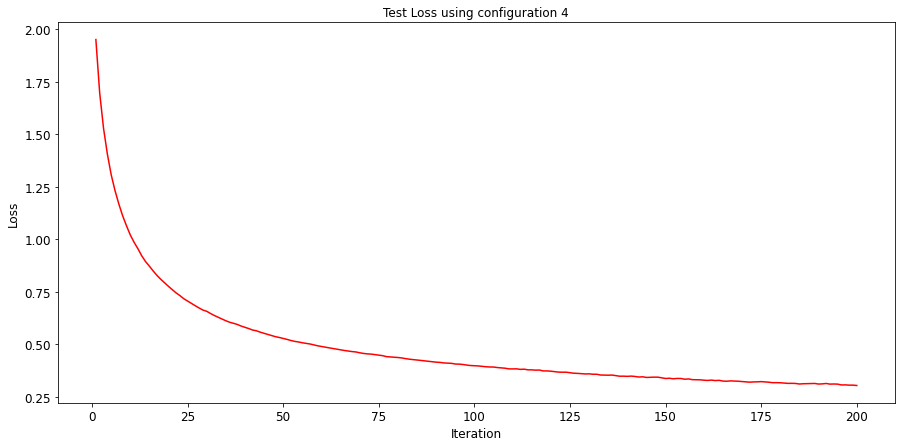

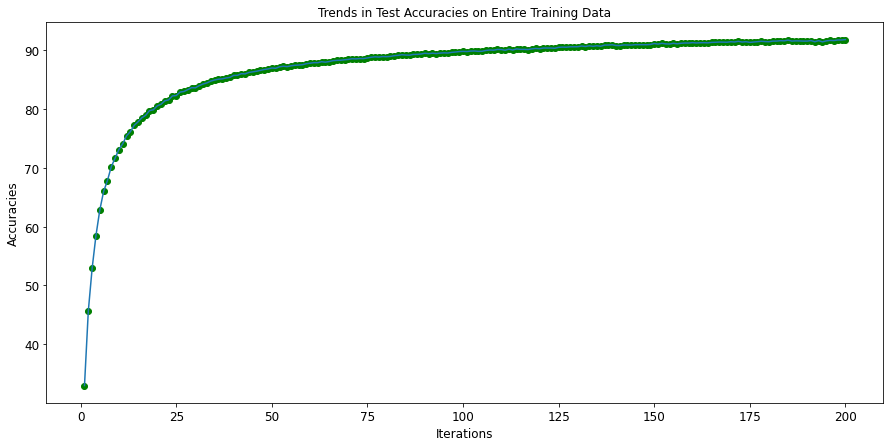

In [32]:
epochs = list(range(1,200+1))
loss= losstrain
plt.figure(figsize=(15,7))
plt.title('Test Loss using configuration 4', fontsize=12)
plt.xlabel('Iteration', size=12)
plt.ylabel('Loss', fontsize=12)
plt.tick_params(labelsize=12);
plt.plot(epochs,loss,c='red')
epochs = list(range(1,200+1))
accuracies= accu_train
plt.figure(figsize=(15,7))
plt.title('Trends in Test Accuracies on Entire Training Data', fontsize=12)
plt.xlabel('Iterations', size=12)
plt.ylabel('Accuracies', fontsize=12)
plt.tick_params(labelsize=12);
plt.scatter(epochs,accuracies,alpha=1,c='green')
plt.plot(epochs,accuracies)

In [33]:
labely_test,labelpred=testing(W2,b2,W1,b1,test_x,test_y,tanh)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Entire Testing data using configuration 4: {}%".format(accuracy_val))

Accuracy on Entire Testing data using configuration 4: 91.07%


In [34]:
def add_ones(X): 
    return np.hstack((np.ones((X.shape[0], 1),dtype=int), X))
train_x=add_ones(train_x)
test_x=add_ones(test_x)
train_x.shape, test_x.shape

((60000, 785), (10000, 785))

In [35]:
def trainingP(X_train, y_train):
        
        dotprod=np.ndarray(10,dtype=np.float32)
        weights=np.zeros((10,X_train.shape[1]), dtype=np.float32)
        iterations=200
        alpha=0.05
        accu=[]
        co=[]
        for iter in range(iterations) : 
            count=0
            for i in range(X_train.shape[0]): 
                for j in range(10): 
                    dotprod[j] = np.dot(X_train[i],weights[j])
                ind=y_train[i]
                maxi=np.argmax(dotprod,axis=None)
                y_pred=maxi             # got predicted corresponding class label
       
                if(y_pred!=y_train[i]):
                #subtracting x input from old weight vector coress to predicted label 
                    weights[maxi] -= alpha*X_train[i]
                #adding x input to old weight vector coress to true label 
                    weights[ind] += alpha*X_train[i]
                elif(y_pred==y_train[i]):
                    count=count+1
                    
            accuracy = round(((count/y_train.shape[0])*100), 2)
            print("Accuracy after epoch "+ str(iter)  + " is : ",accuracy)
            accu.append(accuracy)
            co.append(count)
            
 
        return weights

In [36]:
def testingP(X_test,w):
        ypred=[]
        activ=[]
        activ=np.dot(X_test,w.T)
        for i in range(activ.shape[0]):
            ypred.append(np.argmax(activ[i]))
        return ypred    

In [37]:
y_trainnew.shape

(60000,)

In [38]:
w=trainingP(train_x, y_trainnew)  #got updated weights

Accuracy after epoch 0 is :  85.61
Accuracy after epoch 1 is :  87.72
Accuracy after epoch 2 is :  88.17
Accuracy after epoch 3 is :  88.24
Accuracy after epoch 4 is :  88.56
Accuracy after epoch 5 is :  88.58
Accuracy after epoch 6 is :  88.6
Accuracy after epoch 7 is :  88.84
Accuracy after epoch 8 is :  88.72
Accuracy after epoch 9 is :  88.97
Accuracy after epoch 10 is :  89.03
Accuracy after epoch 11 is :  88.98
Accuracy after epoch 12 is :  89.05
Accuracy after epoch 13 is :  89.11
Accuracy after epoch 14 is :  88.98
Accuracy after epoch 15 is :  89.1
Accuracy after epoch 16 is :  89.04
Accuracy after epoch 17 is :  89.28
Accuracy after epoch 18 is :  89.23
Accuracy after epoch 19 is :  89.19
Accuracy after epoch 20 is :  89.25
Accuracy after epoch 21 is :  89.28
Accuracy after epoch 22 is :  89.49
Accuracy after epoch 23 is :  89.27
Accuracy after epoch 24 is :  89.35
Accuracy after epoch 25 is :  89.39
Accuracy after epoch 26 is :  89.37
Accuracy after epoch 27 is :  89.28
Accu

In [39]:
predictions_for_Training=testingP(train_x,w)
count=0
for i in range(y_trainnew.shape[0]):
    if predictions_for_Training[i]==y_trainnew[i]:
        count=count+1
print("Number of samples correctly classified for training data : ", count)
print('Accuracy in % :', accuracy_score(y_trainnew,predictions_for_Training)*100)

Number of samples correctly classified for training data :  54039
Accuracy in % : 90.065


In [40]:
predictions_for_Testing=testingP(test_x,w)
count=0
for i in range(test_y.shape[0]):
    if predictions_for_Testing[i]==test_y[i]:
        count=count+1

print("Number of samples correctly classified for testing data : ", count)
print('Accuracy in % :', accuracy_score(test_y,predictions_for_Testing)*100)

Number of samples correctly classified for testing data :  8863
Accuracy in % : 88.63


In [41]:
x_xor= np.array([[0,0,0,0],[0,0,0,1],[0,0,1,0],[0,0,1,1],[0,1,0,0],[0,1,0,1],[0,1,1,0],[0,1,1,1],[1,0,0,0],[1,0,0,1],[1,0,1,0],[1,0,1,1],[1,1,0,0],[1,1,0,1],[1,1,1,0],[1,1,1,1]])

In [42]:
y_xor=np.array([0,1,1,0,1,0,0,1,1,0,0,1,0,1,1,0])

In [43]:
X_trainxor,X_testxor,y_trainxor,y_testxor=train_test_split(x_xor,y_xor,test_size=0.3, random_state=42)

In [44]:
y_trainxor = pd.get_dummies(y_trainxor)
y_trainxor=np.array(y_trainxor)

In [45]:
def trainingxor(train_x,train_y,neurons,n,iterations,activation,derive):
    hidden_neurons=neurons
    inputs=train_x.shape[1]
    output_neurons=train_y.shape[1]
    alpha= n
    epochs=iterations
    labely_train=np.argmax(train_y,axis=1)
    weight, bias, weight_new, bias_new= initialize_weights(inputs,hidden_neurons,output_neurons)
    li=[]
    listloss=[]
    for i in range(epochs):
        dotprod1, h1, dotprod2, output=feedforward(train_x,weight,bias,weight_new,bias_new,activation)
        #back propogate
        delta_W2, delta_b2, delta_W1, delta_b1= backpropagation(h1,weight_new,output,train_y,train_x,derive)
        #update weights using gradient descent
        weight_new,bias_new,weight,bias=update_weights(alpha,weight,bias,weight_new,bias_new,delta_W2,delta_b2,delta_W1,delta_b1)
        #again feed forward using updated weights
        dotpro1, h1, dotprod2, output=feedforward(train_x,weight,bias,weight_new,bias_new,activation)
        #Cross Entropy Loss
        L_sum = np.sum(np.multiply(train_y, np.log(output)))
        num_samples = train_y.shape[0]
        loss = -(1./num_samples) * L_sum
        print("Iteration {}: loss while training = {}".format(i + 1,loss))
        listloss.append(loss)
        #Retrieving the corresponding class labels:
        labelpred=np.argmax(output,axis=1)
        #Training Accuracy:
        accuracy = round((accuracy_score(labely_train, labelpred)*100),2)
        print("Training Accuracy after Iteration {} : {}%".format(i+1, accuracy))
        li.append(accuracy)
        
    return weight_new,bias_new,weight,bias,li,listloss

In [46]:
W2,b2,W1,b1,accu_xor,lossX_trainxor = trainingxor(X_trainxor,y_trainxor,2,0.001,60,tanh,tanh_derivative)

Iteration 1: loss while training = 0.7950164820484263
Training Accuracy after Iteration 1 : 36.36%
Iteration 2: loss while training = 0.7948904623135473
Training Accuracy after Iteration 2 : 36.36%
Iteration 3: loss while training = 0.7947646452556647
Training Accuracy after Iteration 3 : 36.36%
Iteration 4: loss while training = 0.7946390305163453
Training Accuracy after Iteration 4 : 36.36%
Iteration 5: loss while training = 0.7945136177377885
Training Accuracy after Iteration 5 : 36.36%
Iteration 6: loss while training = 0.7943884065628225
Training Accuracy after Iteration 6 : 36.36%
Iteration 7: loss while training = 0.794263396634906
Training Accuracy after Iteration 7 : 36.36%
Iteration 8: loss while training = 0.7941385875981246
Training Accuracy after Iteration 8 : 36.36%
Iteration 9: loss while training = 0.7940139790971928
Training Accuracy after Iteration 9 : 36.36%
Iteration 10: loss while training = 0.7938895707774503
Training Accuracy after Iteration 10 : 36.36%
Iteration

In [47]:
labely_test,labelpred=testing(W2,b2,W1,b1,X_testxor,y_testxor,tanh)
accuracy_val=accuracy(labely_test, labelpred)
print("Accuracy on Entire Testing data using configuration 4: {}%".format(accuracy_val))

Accuracy on Entire Testing data using configuration 4: 80.0%
